## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

#display the head of the two data sets to make sure the path is working
#mouse_metadata_df.head()
#study_results_df.head()

# Combine the data into a single dataset called SCC_mice_studies
SCC_mice_studies_df = pd.merge(mouse_metadata_df, study_results_df, on = "Mouse ID")

# Display the data table for preview
SCC_mice_studies_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
mouse_metadata_df.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [3]:
study_results_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
#SCC_mice_studies_df.describe()

In [28]:
# Checking the number of mice.
len(SCC_mice_studies_df["Mouse ID"].unique())

249

In [6]:
SCC_mice_studies_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_mice = SCC_mice_studies_df.loc[SCC_mice_studies_df.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
Duplicate_mice

array(['g989'], dtype=object)

mouse g989 is duplicated 

In [37]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_data = SCC_mice_studies_df.loc[SCC_mice_studies_df["Mouse ID"] == "g989"]
Duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
SCC_mice_studies_clean_df = SCC_mice_studies_df[SCC_mice_studies_df["Mouse ID"].isin(Duplicate_mice)==False]
SCC_mice_studies_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [39]:
# Checking the number of mice in the clean DataFrame.
len(SCC_mice_studies_clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

MeanTVolume = pd.DataFrame(round(SCC_mice_studies_clean_df.groupby(["Drug Regimen"]).mean()['Tumor Volume (mm3)'],2))
MeanTVolume = MeanTVolume.rename(columns={"Tumor Volume (mm3)":"Mean"})

MedianTVolume = pd.DataFrame(round(SCC_mice_studies_clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"],2))
MedianTVolume = MedianTVolume.rename(columns={"Tumor Volume (mm3)":"Median"})

VarianceTVolume = pd.DataFrame(round(SCC_mice_studies_clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"],2))
VarianceTVolume = VarianceTVolume.rename(columns={"Tumor Volume (mm3)":"Variance"})

SD_TVolume = pd.DataFrame(round(SCC_mice_studies_clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"],2))
SD_TVolume = SD_TVolume.rename(columns={"Tumor Volume (mm3)":"Standard Deviation"})

SEM_TVolume = pd.DataFrame(round(SCC_mice_studies_clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"],2))
SEM_TVolume = SEM_TVolume.rename(columns={"Tumor Volume (mm3)": "SEM"})

Summary_Stats = [MeanTVolume, MedianTVolume, VarianceTVolume, SD_TVolume, SEM_TVolume]
Summary_Stats = pd.concat(Summary_Stats, axis = 1)
Summary_Stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
Stats_TVolume = pd.DataFrame(round(SCC_mice_studies_clean_df.groupby(["Drug Regimen"]).describe()["Tumor Volume (mm3)"],2))
Stats_TVolume

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.68,4.99,23.34,37.69,41.56,45.00,48.16
Ceftamin,178.0,52.59,6.27,45.00,47.21,51.78,56.80,68.92
Infubinol,178.0,52.88,6.57,36.32,47.31,51.82,57.31,72.23
Ketapril,188.0,55.24,8.28,45.00,48.23,53.70,60.87,78.57
Naftisol,186.0,54.33,8.13,45.00,47.29,52.51,59.96,76.67
Placebo,181.0,54.03,7.82,45.00,47.46,52.29,59.92,73.21
Propriva,148.0,52.32,6.62,45.00,46.89,50.45,56.49,72.46
Ramicane,228.0,40.22,4.85,22.05,36.67,40.67,45.00,47.62
Stelasyn,181.0,54.23,7.71,45.00,48.05,52.43,58.72,75.12


## Bar and Pie Charts

In [42]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

EachTreat = SCC_mice_studies_clean_df["Drug Regimen"].value_counts()
EachTreat

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Mice')

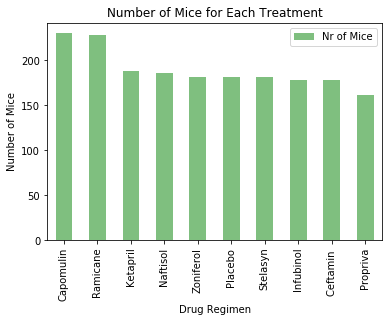

In [43]:
labels = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin ", "Propriva"]
number_mice = [230, 228, 188, 186, 182, 181, 181,  178, 178, 161 ]
EachTreat_plot_df = pd.DataFrame({ "Nr of Mice": number_mice}, index=labels)
EachTreat_plot_df
EachTreat_plot_df.plot.bar(rot=90, facecolor = "green", alpha = 0.5)
plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

Text(0, 0.5, 'Number of Mice')

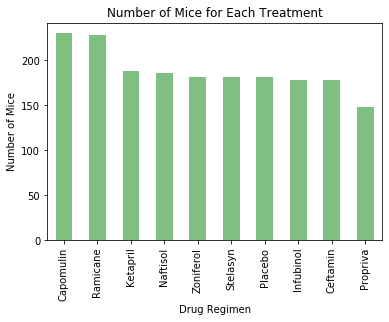

In [44]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
EachTreat_plot = EachTreat.plot(kind = "bar", facecolor = "green", alpha = 0.5)

plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

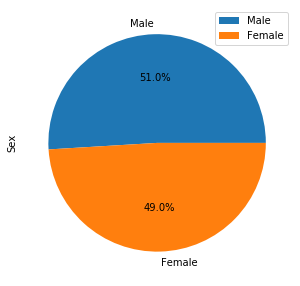

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Female_vs_Male = pd.DataFrame(SCC_mice_studies_clean_df["Sex"].value_counts())
Female_vs_Male
labels = ["Male", "Female"]
Female_vs_Male_df = pd.DataFrame(SCC_mice_studies_clean_df["Sex"].value_counts(), index = labels)
plot = Female_vs_Male_df.plot.pie(y= "Sex", autopct = "%1.1f%%", figsize=(5, 5))

/Users/lilianailut/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


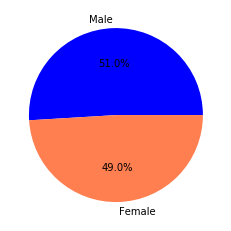

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Female_vs_Male2 = pd.DataFrame(SCC_mice_studies_clean_df["Sex"].value_counts())
labels = ["Male", "Female"]
colors = ["b","coral"]
plt.pie(Female_vs_Male2, colors = colors, labels = labels, autopct="%1.1f%%", startangle= 360)
plt.show()

## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Capomulin = SCC_mice_studies_clean_df.loc[SCC_mice_studies_df['Drug Regimen'] == 'Capomulin']                             
Capomulin = pd.DataFrame(Capomulin.groupby('Mouse ID')['Timepoint'].max())
Capomulin = Capomulin.merge(SCC_mice_studies_df, how = 'left', on = ['Mouse ID','Timepoint'])
Capomulin = Capomulin.rename(columns = {'Tumor Volume (mm3)':'Capomulin'})

Ramicane = SCC_mice_studies_clean_df.loc[SCC_mice_studies_df['Drug Regimen'] == 'Ramicane']
Ramicane = pd.DataFrame(Ramicane.groupby('Mouse ID')['Timepoint'].max())
Ramicane = Ramicane.merge(SCC_mice_studies_df, how = 'left', on = ['Mouse ID','Timepoint'])
Ramicane = Ramicane.rename(columns = {'Tumor Volume (mm3)':'Ramicane'})

Infubinol = SCC_mice_studies_clean_df.loc[SCC_mice_studies_df['Drug Regimen'] == 'Infubinol']                             
Infubinol = pd.DataFrame(Infubinol.groupby('Mouse ID')['Timepoint'].max())
Infubinol = Infubinol.merge(SCC_mice_studies_df, how = 'left', on = ['Mouse ID','Timepoint'])
Infubinol = Infubinol.rename(columns = {'Tumor Volume (mm3)':'Infubinol'})

Ceftamin = SCC_mice_studies_clean_df.loc[SCC_mice_studies_df['Drug Regimen'] == 'Ceftamin']                             
Ceftamin = pd.DataFrame(Ceftamin.groupby('Mouse ID')['Timepoint'].max())
Ceftamin = Ceftamin.merge(SCC_mice_studies_df, how = 'left', on = ['Mouse ID','Timepoint'])
Ceftamin = Ceftamin.rename(columns = {'Tumor Volume (mm3)':'Ceftamin'})


In [48]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Capomulin_quantiles = Capomulin['Capomulin'].quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quantiles[0.25]
Capomulin_upperq = Capomulin_quantiles[0.75]
Capomulin_iqr = Capomulin_upperq - Capomulin_lowerq
Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr)

print("-------------------------------------------")
print(f'Capomulin IQR: {Capomulin_iqr}')
print(f"Values below {Capomulin_lower_bound} could be outliers.")
print(f"Values above {Capomulin_upper_bound} could be outliers.")
print("-------------------------------------------")

Ramicane_quantiles = Ramicane['Ramicane'].quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quantiles[0.25]
Ramicane_upperq = Ramicane_quantiles[0.75]
Ramicane_iqr = Ramicane_upperq - Ramicane_lowerq
Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)
print(f'Ramicane IQR: {Ramicane_iqr}')
print(f"Values below {Ramicane_lower_bound} could be outliers.")
print(f"Values above {Ramicane_upper_bound} could be outliers.")
print("-------------------------------------------")

Infubinol_quantiles = Infubinol['Infubinol'].quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quantiles[0.25]
Infubinol_upperq = Infubinol_quantiles[0.75]
Infubinol_iqr = Infubinol_upperq - Infubinol_lowerq
Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)

print(f'Infubinol IQR: {Infubinol_iqr}')
print(f"Values below {Infubinol_lower_bound} could be outliers.")
print(f"Values above {Infubinol_upper_bound} could be outliers.")
print("-------------------------------------------")


Ceftamin_quantiles = Ceftamin['Ceftamin'].quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quantiles[0.25]
Ceftamin_upperq = Ceftamin_quantiles[0.75]
Ceftamin_iqr = Ceftamin_upperq - Ceftamin_lowerq
Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)

print(f'Ceftamin IQR: {Ceftamin_iqr}')
print(f"Values below {Ceftamin_lower_bound} could be outliers.")
print(f"Values above {Ceftamin_upper_bound} could be outliers.")
print("-------------------------------------------")

-------------------------------------------
Capomulin IQR: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-------------------------------------------
Ramicane IQR: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-------------------------------------------
Infubinol IQR: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
-------------------------------------------
Ceftamin IQR: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
-------------------------------------------


Text(0, 0.5, 'Tumor Volume')

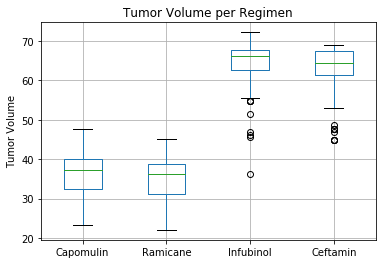

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Final_TVolume_df = Capomulin.merge(Ramicane, how = 'right', on  = 'Timepoint')
Final_TVolume_df = Final_TVolume_df.merge(Infubinol, how = 'right', on = 'Timepoint')
Final_TVolume_df = Final_TVolume_df.merge(Ceftamin, how = 'right', on = 'Timepoint')
Final_TVolume_df

FinalBoxPlot = Final_TVolume_df.boxplot(column=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
FinalBoxPlot.set_title('Tumor Volume per Regimen')
FinalBoxPlot.set_ylabel('Tumor Volume')

## Line and Scatter Plots

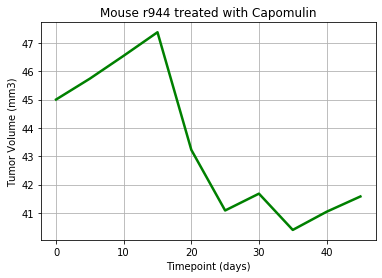

In [50]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulin_df = SCC_mice_studies_clean_df.loc[SCC_mice_studies_clean_df["Drug Regimen"] == "Capomulin"]
One_mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "r944"]
plt.plot(One_mouse_df["Timepoint"], One_mouse_df["Tumor Volume (mm3)"], color="g", linewidth = 2.5)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse r944 treated with Capomulin")
plt.grid()
plt.show()

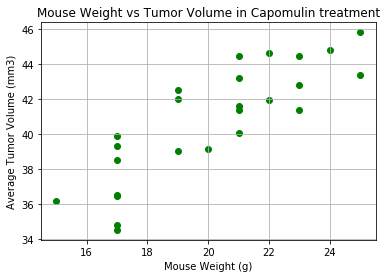

In [51]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_avg = Capomulin_df.groupby(["Mouse ID"]).mean()
plt.scatter(Capomulin_avg["Weight (g)"], Capomulin_avg["Tumor Volume (mm3)"], color="green")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Tumor Volume in Capomulin treatment")
plt.grid()
plt.show()

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Correlation_W_T = round(st.pearsonr(Capomulin_avg["Weight (g)"],Capomulin_avg["Tumor Volume (mm3)"])[0],2) 
print(f"The correlation coefficient between mouse weight and average tumor volume is {Correlation_W_T} .")

The correlation coefficient between mouse weight and average tumor volume is 0.84 .


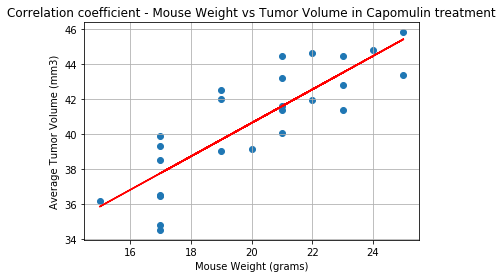

In [52]:
x_values = Capomulin_avg["Weight (g)"]
y_values = Capomulin_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_vals = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_vals,"r-")
plt.xlabel("Mouse Weight (grams)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Correlation coefficient - Mouse Weight vs Tumor Volume in Capomulin treatment")
plt.grid()
plt.show()